<a href="https://colab.research.google.com/github/Ashad001/ML-DL-Projects/blob/main/TitanicSurvivor/Titanic_Survivor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv("train.csv")

In [202]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0


In [205]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


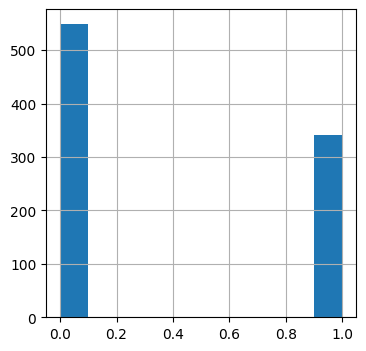

In [207]:
plt.figure(figsize = (4,4))
data['Survived'].hist()
plt.show()

<ipython-input-208-b4718e2c9ceb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


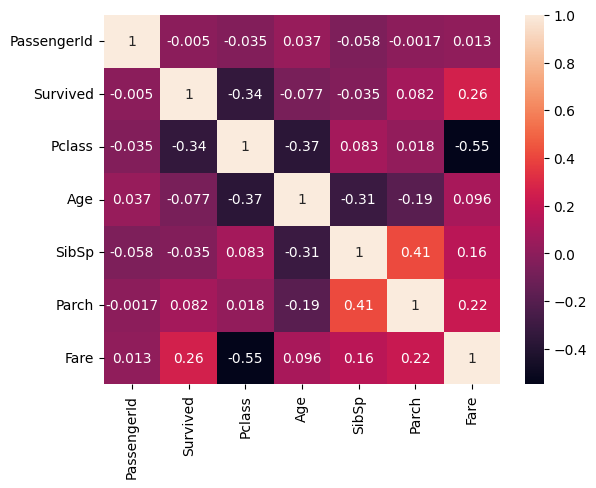

In [208]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)
plt.show()

Dividing main features in equal sizes for train and test sets

In [209]:
from sklearn.model_selection import StratifiedShuffleSplit

In [210]:
data_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)

for train_index, test_index in data_split.split(data, data[['Survived', 'Pclass', 'Sex']]):
  train_set = data.loc[train_index]
  test_set = data.loc[test_index]


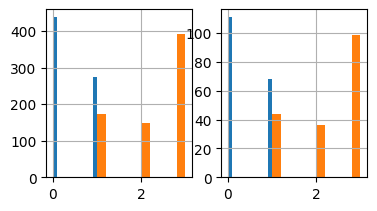

In [211]:
plt.subplot(2,3,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()
# train_set['Sex'].hist()

plt.subplot(2,3,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()
# test_set['Sex'].hist()

plt.show()

Managing null values.

In [212]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 339 to 306
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          579 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [213]:
from sklearn.preprocessing import OneHotEncoder
def ToGender(X):
  encoder = OneHotEncoder()
  mat = encoder.fit_transform(X[['Sex']]).toarray()
  col_names = ['Female', 'Male']
  # print(mat.T)
  for i in range(len(mat.T)):
    X[col_names[i]] = mat.T[i].astype(int)
  return X

In [214]:
from sklearn.impute import SimpleImputer
def AgeImputer(X):
  imputer = SimpleImputer(strategy='mean')
  X['Age'] = imputer.fit_transform(X[['Age']]).astype(int)
  # X['Age'] = X['Age'].astype(int)
  return X

In [215]:
def FeatureDrop(X):
  X = X.drop(['PassengerId', 'Embarked', 'Name', 'Ticket', 'Cabin', 'Sex'], axis = 1)
  return X

In [216]:
def MyPipeline(X):
  X = ToGender(X)
  X = AgeImputer(X)
  X = FeatureDrop(X)
  return X

In [217]:
train_set = MyPipeline(train_set)

In [218]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 339 to 306
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    int64  
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Female    712 non-null    int64  
 7   Male      712 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 50.1 KB


In [219]:
from sklearn.preprocessing import StandardScaler

X_train = train_set.drop(['Survived'], axis = 1)
y_train = train_set['Survived']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
Y_train = y_train.to_numpy()
Y_train = np.expand_dims(Y_train, axis = 1)

In [220]:
X_train.shape, Y_train.shape

((712, 7), (712, 1))

In [221]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [222]:
model = Sequential(
  [
    tf.keras.Input(shape = (7, )),
    Dense(units = 20, activation='relu', name = 'L1'),
    Dense(units = 7, activation='relu', name = 'L2'),
    Dense(units = 1, activation='sigmoid', name = 'L4'),
  ], name = 'Model_1'
)
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 20)                160       
                                                                 
 L2 (Dense)                  (None, 7)                 147       
                                                                 
 L4 (Dense)                  (None, 1)                 8         
                                                                 
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


In [223]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(0.001),)

In [224]:
model.fit(X_train, Y_train, epochs = 200, verbose = 0)

In [225]:
yhat = model.predict(X_train)
yhat = np.where(yhat >= 0.5 , 1, 0)
train_error = np.mean(yhat != Y_train)
yhat.shape, Y_train.shape


23/23 [==============================] - 0s 2ms/step


((712, 1), (712, 1))

In [226]:
train_error

0.14325842696629212

In [227]:
test_set = MyPipeline(test_set)

In [228]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 20 to 389
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  179 non-null    int64  
 1   Pclass    179 non-null    int64  
 2   Age       179 non-null    int64  
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Female    179 non-null    int64  
 7   Male      179 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [229]:
X_test = test_set.drop(['Survived'], axis = 1)
y_test = test_set['Survived']
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
Y_test = y_test.to_numpy()
Y_test = np.expand_dims(Y_test, axis = 1)

In [230]:
yhat = model.predict(X_test)
yhat = np.where(yhat >= 0.5 , 1, 0)
test_error = np.mean(yhat != Y_test)
yhat.shape, Y_test.shape

6/6 [==============================] - 0s 2ms/step


((179, 1), (179, 1))

In [231]:
test_error


0.2122905027932961

In [232]:
final_data = data
final_data = MyPipeline(final_data)

In [233]:
x_final = final_data.drop(['Survived'], axis = 1)
y_final = final_data['Survived']
scaler = StandardScaler()
X_final = scaler.fit_transform(x_final)
Y_final = y_final.to_numpy()
Y_final = np.expand_dims(Y_final, axis = 1)

In [234]:
yhat = model.predict(X_final)
yhat = np.where(yhat >= 0.5 , 1, 0)
final_error = np.mean(yhat != Y_final)
yhat.shape, Y_final.shape

28/28 [==============================] - 0s 1ms/step


((891, 1), (891, 1))

In [235]:
final_error

0.15712682379349047

In [236]:
test_data = pd.read_csv('test.csv')

In [237]:
test_sub = MyPipeline(test_data)

In [238]:
test_sub = test_sub.fillna(method='bfill')

In [239]:
test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    int64  
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   Female  418 non-null    int64  
 6   Male    418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [240]:
scaler = StandardScaler()
test_sub = scaler.fit_transform(test_sub)

In [241]:
predictions = model.predict(test_sub)
predictions = np.where(predictions >= 0.5 , 1, 0)

14/14 [==============================] - 0s 1ms/step


In [242]:
predictions[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [243]:
predictions = np.squeeze(predictions)

In [244]:
predictions[:5]

array([0, 0, 0, 0, 0])

In [245]:
sub_df = pd.DataFrame(test_data['PassengerId'])
sub_df['Survived'] = predictions

In [246]:
sub_df.to_csv('/content/predictions.csv', index = False)